In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Number of samples
N = 10

# Degree of polynomial
M = 4

# Set random seed to make deterministic
np.random.seed(555)

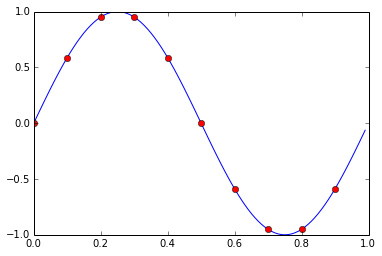

In [3]:
# The ground truth sinusoid
xground = np.arange(0, 1, 0.01)
yground = np.sin(2*np.pi*xground)

# Get some points at regular interval
x = np.arange(0, 1, 1./N)
tground = np.sin(2*np.pi*x)
        
plt.plot(xground,yground)
plt.plot(x, tground, 'ro')

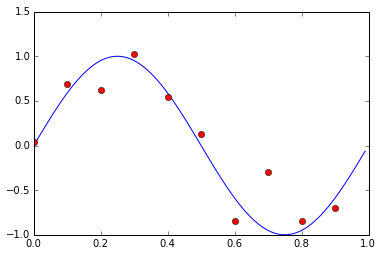

In [4]:
# Create our gaussian noise
std_deviation = 0.3
noise = std_deviation * np.random.randn(N)
t = tground + noise

plt.plot(xground,yground)
plt.plot(x, t, 'ro')

In [5]:
# Function to evaluate a polynomial with coefficients w
# (ordered by decreasing degree)
# could also use builtin polyval(w, x)
def polynomial(w, x):
    powers = range(0,len(w))
    powers.reverse()
    
    powered = np.array(x)[:,np.newaxis] ** np.array(powers)
    return np.dot(powered, w)

# Define our error function
def err(w, x, t):
    return 0.5 * sum((polynomial(w,x)-t)**2)

# Root Mean Square error - in same units as data
def rms(w, x, t):
    return np.sqrt(2 * err(w, x, t)/len(x))


[ -1.78887271e+00   1.98293149e+01  -2.71899014e+01   8.93654375e+00
   2.30848663e-02]


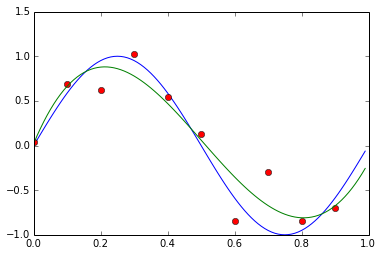

In [6]:
# As we shall see, the error can be minimised in closed form
# for the moment, we'll use the built-in function polyfit to do this

w = np.polyfit(x, t, M)
print w

# Let's see what our polynomial looks like (green)
plt.plot(xground, yground)
plt.plot(x, t, 'ro')
plt.plot(xground, polynomial(w, xground), 'g')

Train Error 0.258335230389
Test Error 0.589296810631


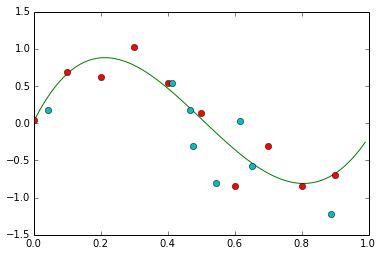

In [7]:
# Now we will define a testing set to see
# how well this model works, generated similarly
# to our training data
Ntest = 8
xtest = np.random.random_sample(Ntest)
ytest = np.sin(2*np.pi*xtest) + np.random.randn(Ntest) * std_deviation

plt.plot(xground, polynomial(w, xground), 'g')
plt.plot(x, t, 'ro')
plt.plot(xtest, ytest, 'co')

print "Train Error", err(w, x, t)
print "Test Error", err(w, xtest, ytest)


Train Error 1.12720168205e-19
Test Error 5.84814955159


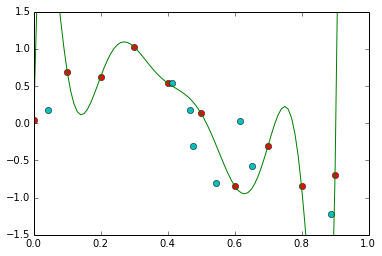

In [8]:
# What if we use a higher order polynomial?
w_higher = np.polyfit(x, t, 9)


plt.plot(x, t, 'ro')
plt.plot(xtest, ytest, 'co')
plt.plot(xground, np.polyval(w_higher, xground), 'g', scaley=False)

print "Train Error", err(w_higher, x, t)
print "Test Error", err(w_higher, xtest, ytest)

# It passes directly through all our training points, but generalises
# poorly for predicting the test points - overfitting!


/Library/Python/2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


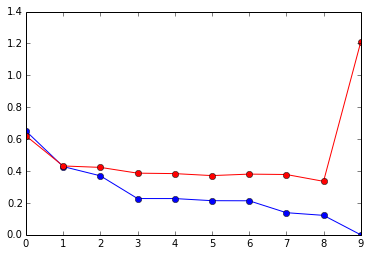

In [11]:
# Let's compare the train and test error for different
# orders of polynomial
test_err = []
train_err = []

maxorder = 10

for m in range(0,maxorder):
    weights = np.polyfit(x, t, m)
    train_err.append(rms(weights, x, t))
    test_err.append(rms(weights, xtest, ytest))
    
plt.plot(range(0,maxorder), train_err, 'bo-')
plt.plot(range(0,maxorder), test_err, 'ro-')